# <center>Final Examination
   

<img src="https://drive.google.com/uc?id=1XpHQJ9sKzklxj5Tz01OkoqSbQ6xYQQAI" align=right width=100>

<div align= "right">ปัทมา เดชะอูป<br>รหัสนักศึกษา 1710511104018</div>

**Description : This program uses the dual moving average crossover to determine when to buy and sell stock**

In [4]:
#Import the libraries
import pandas as pd
from pandas_datareader import data
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
#load the data
AAPL = data.DataReader('AAPL', data_source="yahoo", start='2018-03-01', end='2021-03-01') 
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-28,45.154999,44.512501,44.814999,44.529999,151128400.0,42.962379
2018-03-01,44.945000,43.165001,44.634998,43.750000,195208000.0,42.209846
2018-03-02,44.075001,43.112499,43.200001,44.052502,153816000.0,42.501698
2018-03-05,44.435001,43.630001,43.802502,44.205002,113605600.0,42.648827
2018-03-06,44.562500,44.032501,44.477501,44.167500,95154000.0,42.612656


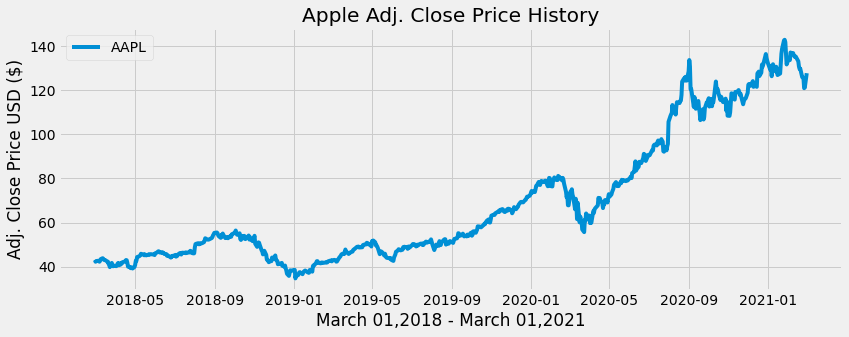

In [8]:
#Visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('March 01,2018 - March 01,2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [9]:
#Create the simple moving average with a 30 days window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close
Date,
2018-02-28,NaN
2018-03-01,NaN
2018-03-02,NaN
2018-03-05,NaN
2018-03-06,NaN
...,...
2021-02-23,133.520064
2021-02-24,133.405478
2021-02-25,133.151551


In [11]:
#Create a simple moving 100 days average
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
Date,
2018-02-28,NaN
2018-03-01,NaN
2018-03-02,NaN
2018-03-05,NaN
2018-03-06,NaN
...,...
2021-02-23,124.513904
2021-02-24,124.613023
2021-02-25,124.658774


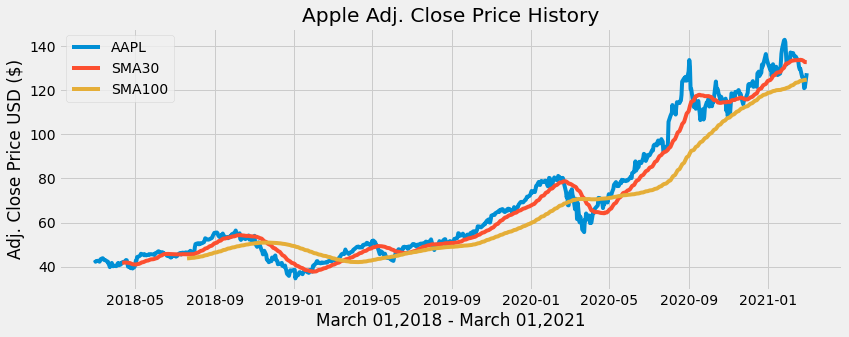

In [12]:
#Visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('March 01,2018 - March 01,2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [13]:
#Create a new data frame to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,AAPL,SMA30,SMA100
Date,,,
2018-02-28,42.962379,NaN,NaN
2018-03-01,42.209846,NaN,NaN
2018-03-02,42.501698,NaN,NaN
2018-03-05,42.648827,NaN,NaN
2018-03-06,42.612656,NaN,NaN
...,...,...,...
2021-02-23,125.860001,133.520064,124.513904
2021-02-24,125.349998,133.405478,124.613023
2021-02-25,120.989998,133.151551,124.658774


In [27]:
#Create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['AAPL'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['AAPL'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy,sigPriceSell)

In [28]:
#Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [29]:
#Show the data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2018-02-28,42.962379,NaN,NaN,NaN,NaN
2018-03-01,42.209846,NaN,NaN,NaN,NaN
2018-03-02,42.501698,NaN,NaN,NaN,NaN
2018-03-05,42.648827,NaN,NaN,NaN,NaN
2018-03-06,42.612656,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-02-23,125.860001,133.520064,124.513904,NaN,NaN
2021-02-24,125.349998,133.405478,124.613023,NaN,NaN
2021-02-25,120.989998,133.151551,124.658774,NaN,NaN


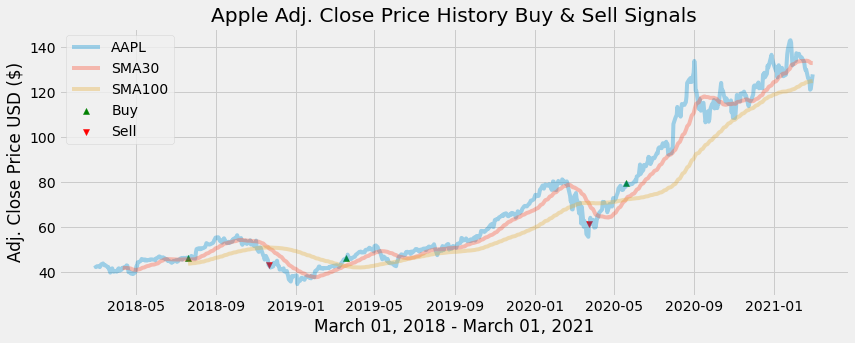

In [30]:
#Visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.6, 4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adj. Close Price History Buy & Sell Signals')
plt.xlabel('March 01, 2018 - March 01, 2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

## ยังไม่เสร็จ อย่าเพิ่งอ่านค่าาาา